In [ ]:
import serial
import numpy as np
from PIL import Image
import keyboard
import matplotlib.pyplot as plt
import json
import random

In [ ]:
sarr = []
for i in range(4):
	s = '1111000'
	s = s[:i] + '0' + s[i + 1:]
	for j in range(8):
		s2 = str(bin(j))[2:]
		s = s[:-len(s2)] + s2
		sarr.append(s)
print(sarr)

In [ ]:
file_path = 'data.json'

def save_data(dataSet):
    label = input("give this data a label")
    # print("label:", label)
    # print("dataSet:\n", dataSet)
    data = load_json_file()
    append_array_to_dict_entry(data, label, dataSet)
    save_json_file(data)

def load_json_file():
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def save_json_file(data):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=2)

def append_array_to_dict_entry(data_dict, data_label, array):
    if data_label in data_dict:
        existing_arrays = data_dict[data_label]
        combined_array = np.append(existing_arrays, array, axis=0)
        data_dict[data_label] = combined_array.tolist()
    else:
        data_dict[data_label] = array.tolist()

In [ ]:
save_json_file({})

for i in range(10):
    N = random.randint(1, 15)
    array = np.random.rand(N, 16, 16)
    save_data(array)

data = load_json_file()

for label, arrays in data.items():
    print(f"Data Label: {label}")
    array_np = np.array(arrays)
    print(f"Array Shape: {array_np.shape}")

1184


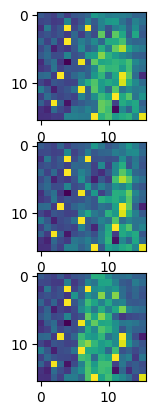

In [71]:
data = load_json_file()

lb = 'sidehandR'
ln = len(data[lb])

print(ln)

fig, axs = plt.subplots(3)
axs[0].imshow(data[lb][0])
axs[1].imshow(data[lb][ln//2])
axs[2].imshow(data[lb][-1])

# for label, arrays in data.items():
#     print(f"Data Label: {label}")
#     l = min(5, len(arrays))
#     fig, axs = plt.subplots(l)
#     for i in range(l, 0):
#         axs[i].imshow(arrays[i])
        

In [69]:
# Establish the serial connection
# ser = serial.Serial('COM5', 9600) # for josh
ser = serial.Serial('/dev/tty.usbmodem2101', 9600) # for pablo

#size 256 array
handArray =  np.arange(256, dtype=float)
#3d data set
dataSet = np.empty((0, 16, 16), dtype=float)
start = False
i = 0
j = 0 


command = ''
while command != 'g':
  command = input("type g to begin")
  ser.write(command.encode())

while True:
  
  if keyboard.is_pressed('esc'):
    res = input("type g to end")
    if (res == 'g'):
      ser.write(res.encode())
      save_data(dataSet)
      np.save('dataSet.npy', dataSet)
      break
    elif (res[0] == 'f'):
      ser.write(res.encode())
  
  data = ser.readline()
  data = data.decode().strip().split() # Decode the received bytes and remove whitespace
  selects = data[0]
  # data = [int(data[k:k+1]) for k in range(len(data))]
  inputData = np.float_(data[1:])*5/1024
  if (selects == sarr[0]):
    start = True
  # if (start):
  #   print(selects, inputData)
  
  if (start):
    if (selects != sarr[j]):
      print(j, selects, "error")
    # print(i, selects, (inputData))

    #loops through array with prper indexing
    if i < 8:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 8:
        i = 64

    elif i > 8 and i < 72:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 72:
        i = 128
      
    elif i > 72 and i < 136:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 136:
        i = 192
    
    elif i > 135 and i < 200:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 200:
        i = 0
        array = (np.reshape(handArray, (16,16)))
        # print(array)
        dataSet = np.append(dataSet,[array], axis = 0)
    
    j = (j+1) % 32

#close the connection
ser.close()


In [ ]:
d = np.load('dataSet.npy')

image = Image.new("1", (16, 16))
# Load the pixel data from the array
pixels = [pixel for row in d[0] for pixel in row]

# Put the pixel data into the image
image.putdata(pixels)

# Save the image to a file
image.save("output.png")

plt.imshow(d[0])
plt.savefig('pltfig.png')

In [ ]:
for i in range(0, len(d)):
    print(d[i])
    print()

In [35]:
dataSet.shape
save_data(dataSet)

In [74]:
data = load_json_file()

# Pad each array in the dictionary to make them 32x32
data_pad = {}
for key, value in data.items():
    padded_arrays = []
    for arr in value:
        padded_array = np.pad(arr, ((8, 8), (8, 8)), mode='constant').tolist()
        padded_arrays.append(padded_array)
    data_pad[key] = padded_arrays

# # Print the original and padded dictionary
# print("Original Dictionary:\n", data)
# print("\nPadded Dictionary:\n", data_pad)


with open('data_pad.json', 'w') as file:
    json.dump(data_pad, file, indent=2)